In [1]:
# data cleaning
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('df_total_result.csv')
df.head()

,Unnamed: 0,user_id,nbr_order,mean_days_bt_order,nbr_order_weekends,nbr_order_weekday,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Kcluster_aisle_n,Kcluster-combine
0,0,1,11,19.00,8.0,3.0,72.73,6.0,5.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.857143,2,0
1,1,2,15,16.29,9.0,6.0,60.00,0.0,15.0,0.0,...,0.442478,0.000000,0.0,0.0,0.0,0.884956,0.0,18.584071,2,2
2,2,5,5,11.50,2.0,3.0,40.00,2.0,3.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,6.521739,0,0
3,3,7,21,10.45,10.0,11.0,47.62,6.0,15.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.325581,2,3
4,4,8,4,23.33,2.0,2.0,50.00,1.0,1.0,2.0,...,1.492537,1.492537,0.0,0.0,0.0,0.000000,0.0,0.000000,0,0


In [3]:
df.columns.to_list()

['Unnamed: 0',
 'user_id',
 'nbr_order',
 'mean_days_bt_order',
 'nbr_order_weekends',
 'nbr_order_weekday',
 'percent_order_weekends',
 'nbr_order_offpeak',
 'nbr_order_peak',
 'nbr_order_unusual',
 'percent_order_offpeak',
 'percent_order_peak',
 'percent_order_unnusual',
 'basket_size',
 'reordered_ratio',
 'nbr_unique_product_ordered',
 'nbr_unique_aisle_ordered',
 'ratio_aisle_ordered',
 'Kcluster_user',
 'air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drin

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### explore segment size

In [5]:
df['Kcluster-combine'].value_counts()

0    65320
3    41403
2    18916
1     5570
Name: Kcluster-combine, dtype: int64

In [6]:
df['Kcluster_user'].value_counts()

1    65718
2    41074
0    18841
3     5576
Name: Kcluster_user, dtype: int64

In [7]:
df['Kcluster_aisle_n'].value_counts()

2    67105
0    41358
3    19089
1     3657
Name: Kcluster_aisle_n, dtype: int64

### explore overlap between clustering method

In [8]:
pd.crosstab(df['Kcluster-combine'], df.Kcluster_user, dropna=False,margins=True)

Kcluster_user,0,1,2,3,All
Kcluster-combine,,,,,
0,0,65092,228,0,65320
1,0,0,0,5570,5570
2,18841,0,69,6,18916
3,0,626,40777,0,41403
All,18841,65718,41074,5576,131209


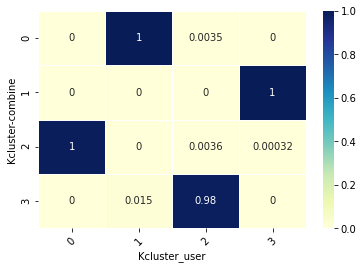

In [9]:

sns.heatmap(pd.crosstab(df['Kcluster-combine'], df.Kcluster_user, dropna=False,margins=False, normalize='index'),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()
# there are high overlap b/t Kcluster-combine and Kcluster_user

In [10]:
pd.crosstab(df['Kcluster-combine'], df.Kcluster_aisle_n, dropna=False,margins=True)

Kcluster_aisle_n,0,1,2,3,All
Kcluster-combine,,,,,
0,15595,3220,33974,12531,65320
1,2351,9,2822,388,5570
2,7710,88,9362,1756,18916
3,15702,340,20947,4414,41403
All,41358,3657,67105,19089,131209


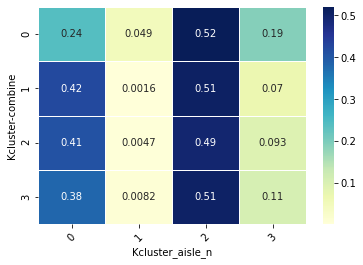

In [11]:
sns.heatmap(pd.crosstab(df['Kcluster-combine'], df.Kcluster_aisle_n, dropna=False,margins=False, normalize='index'),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()
# Low overlap between Kcluster-combine and Kcluster_aisle 
# There are a difference between segmentation by User behavior and segmentation by product aisle preference

### target features

In [12]:
df.columns.to_list()

['user_id',
 'nbr_order',
 'mean_days_bt_order',
 'nbr_order_weekends',
 'nbr_order_weekday',
 'percent_order_weekends',
 'nbr_order_offpeak',
 'nbr_order_peak',
 'nbr_order_unusual',
 'percent_order_offpeak',
 'percent_order_peak',
 'percent_order_unnusual',
 'basket_size',
 'reordered_ratio',
 'nbr_unique_product_ordered',
 'nbr_unique_aisle_ordered',
 'ratio_aisle_ordered',
 'Kcluster_user',
 'air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drink mixes',
 'cof

In [13]:
user_features=['nbr_order', 'mean_days_bt_order', 'nbr_order_weekends',
 'nbr_order_weekday', 'percent_order_weekends', 'nbr_order_offpeak',
 'nbr_order_peak', 'nbr_order_unusual', 'percent_order_offpeak',
 'percent_order_peak', 'percent_order_unnusual', 'basket_size',
 'reordered_ratio', 'nbr_unique_product_ordered', 'nbr_unique_aisle_ordered',
 'ratio_aisle_ordered', 'Kcluster_user']

In [14]:
aisle_features= ['air fresheners candles', 'asian foods', 'baby accessories', 'baby bath body care',
 'baby food formula', 'bakery desserts', 'baking ingredients', 'baking supplies decor', 'beauty',
 'beers coolers', 'body lotions soap', 'bread', 'breakfast bakery', 'breakfast bars pastries',
 'bulk dried fruits vegetables', 'bulk grains rice dried goods', 'buns rolls', 'butter',
 'candy chocolate', 'canned fruit applesauce', 'canned jarred vegetables',
 'canned meals beans', 'canned meat seafood', 'cat food care',
 'cereal', 'chips pretzels', 'cleaning products', 'cocoa drink mixes',
 'coffee', 'cold flu allergy', 'condiments', 'cookies cakes',
 'crackers', 'cream', 'deodorants', 'diapers wipes', 'digestion',
 'dish detergents', 'dog food care', 'doughs gelatins bake mixes', 'dry pasta',
 'eggs', 'energy granola bars', 'energy sports drinks', 'eye ear care', 'facial care', 'feminine care',
 'first aid', 'food storage', 'fresh dips tapenades', 'fresh fruits', 'fresh herbs', 'fresh pasta',
 'fresh vegetables', 'frozen appetizers sides', 'frozen breads doughs', 'frozen breakfast',
 'frozen dessert', 'frozen juice', 'frozen meals', 'frozen meat seafood', 'frozen pizza',
 'frozen produce', 'frozen vegan vegetarian', 'fruit vegetable snacks', 'grains rice dried goods',
 'granola', 'hair care', 'honeys syrups nectars', 'hot cereal pancake mixes', 'hot dogs bacon sausage',
 'ice cream ice', 'ice cream toppings', 'indian foods', 'instant foods', 'juice nectars', 'kitchen supplies',
 'kosher foods', 'latino foods', 'laundry', 'lunch meat', 'marinades meat preparation', 'meat counter',
 'milk', 'mint gum', 'missing', 'more household', 'muscles joints pain relief', 'nuts seeds dried fruit',
 'oils vinegars', 'oral hygiene', 'other', 'other creams cheeses', 'packaged cheese', 'packaged meat', 'packaged poultry',
 'packaged produce', 'packaged seafood', 'packaged vegetables fruits', 'paper goods', 'pasta sauce',
 'pickled goods olives', 'plates bowls cups flatware', 'popcorn jerky', 'poultry counter',
 'prepared meals', 'prepared soups salads', 'preserved dips spreads', 'protein meal replacements', 'red wines',
 'refrigerated', 'refrigerated pudding desserts', 'salad dressing toppings', 'seafood counter', 'shave needs',
 'skin care', 'soap', 'soft drinks', 'soup broth bouillon', 'soy lactosefree', 'specialty cheeses', 'specialty wines champagnes',
 'spices seasonings', 'spirits', 'spreads', 'tea', 'tofu meat alternatives', 'tortillas flat bread', 'trail mix snack mix',
 'trash bags liners', 'vitamins supplements', 'water seltzer sparkling water', 'white wines', 'yogurt',
 'Kcluster_aisle_n']

## User behaviors exploration

In [15]:
df_users= df[user_features]

In [16]:
df_users.groupby('Kcluster_user').mean().round().T
# features to be drop: nbr_order_weekends,nbr_order_weekday, nbr_order_offpeak, nbr_order_peak,nbr_order_unusual

Kcluster_user,0,1,2,3
nbr_order,33.0,9.0,16.0,56.0
mean_days_bt_order,11.0,18.0,15.0,7.0
nbr_order_weekends,22.0,6.0,10.0,37.0
nbr_order_weekday,12.0,3.0,6.0,19.0
percent_order_weekends,64.0,66.0,62.0,66.0
nbr_order_offpeak,8.0,2.0,4.0,14.0
nbr_order_peak,24.0,6.0,12.0,40.0
nbr_order_unusual,1.0,0.0,1.0,2.0
percent_order_offpeak,25.0,24.0,24.0,25.0
percent_order_peak,72.0,72.0,72.0,71.0


In [17]:
df_users.drop(['nbr_order_weekends','nbr_order_weekday', 'nbr_order_offpeak', 'nbr_order_peak','nbr_order_unusual'],
             axis=1, inplace= True)

C:\Users\tangh\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df_users.groupby('Kcluster_user').mean().round().T
# average per user

Kcluster_user,0,1,2,3
nbr_order,33.0,9.0,16.0,56.0
mean_days_bt_order,11.0,18.0,15.0,7.0
percent_order_weekends,64.0,66.0,62.0,66.0
percent_order_offpeak,25.0,24.0,24.0,25.0
percent_order_peak,72.0,72.0,72.0,71.0
percent_order_unnusual,4.0,4.0,4.0,4.0
basket_size,14.0,7.0,12.0,16.0
reordered_ratio,61.0,41.0,50.0,66.0
nbr_unique_product_ordered,139.0,29.0,76.0,245.0
nbr_unique_aisle_ordered,49.0,17.0,34.0,65.0


In [19]:
df_users['Kcluster_user'].value_counts(normalize= True)

1    0.500865
2    0.313043
0    0.143595
3    0.042497
Name: Kcluster_user, dtype: float64

**General description:**
- 2/3 orders: made during weekends
- ~70% order: made during peak hours (9-17)
- Product penatration: 
- Aisle penatration: 

**Segment differences:**
- 3 & 0 (4%+14%): Frequent weekly customers, high number of order, high rate of reordered
- 2 (30%): Regular biweekly customers
- 1 (50%): Occasional customers

In [20]:
df_aisle=df[aisle_features + ['Kcluster_user']]

In [21]:
aisle_by_users= df_aisle.groupby('Kcluster_user').mean().round(2).T.sort_values(3, ascending=False)
aisle_by_users

Kcluster_user,0,1,2,3
fresh vegetables,11.22,8.21,10.84,11.12
fresh fruits,10.80,10.40,10.45,10.72
packaged vegetables fruits,5.41,4.93,5.38,5.41
yogurt,4.42,3.34,4.16,4.42
packaged cheese,3.09,2.57,3.01,3.24
...,...,...,...,...
specialty wines champagnes,0.03,0.10,0.04,0.03
facial care,0.04,0.09,0.05,0.03
beauty,0.02,0.03,0.02,0.02
eye ear care,0.02,0.07,0.04,0.02


In [22]:
aisle_by_users['avg']= aisle_by_users.mean(axis=1)

In [23]:
aisle_by_users.head(15)
# no significant difference between users segments

Kcluster_user,0,1,2,3,avg
fresh vegetables,11.22,8.21,10.84,11.12,10.3475
fresh fruits,10.80,10.40,10.45,10.72,10.5925
packaged vegetables fruits,5.41,4.93,5.38,5.41,5.2825
yogurt,4.42,3.34,4.16,4.42,4.0850
packaged cheese,3.09,2.57,3.01,3.24,2.9775
milk,2.60,2.74,2.46,2.66,2.6150
chips pretzels,2.19,2.21,2.24,2.13,2.1925
water seltzer sparkling water,2.31,4.16,2.51,2.03,2.7525
bread,1.78,1.63,1.75,1.90,1.7650
soy lactosefree,1.94,1.91,1.94,1.84,1.9075


## Aisle preference segment exploration

In [24]:
df_aisle.Kcluster_aisle_n.value_counts(normalize=True) *100

2    51.143595
0    31.520704
3    14.548545
1     2.787156
Name: Kcluster_aisle_n, dtype: float64

In [25]:
aisle_result= df_aisle.groupby('Kcluster_aisle_n').mean().round(2).T.sort_values(1,ascending=False).reset_index()
aisle_result.columns= ['aisle','0','1','2','3']

In [26]:
department= pd.read_csv('data/products.csv').merge(
    pd.read_csv('data/aisles.csv'),how='inner').merge(
    pd.read_csv('data/departments.csv'),how='inner').drop(['product_id','product_name','aisle_id','aisle_id','department_id'],
                                                           axis=1)

In [27]:
department[department.department == 'produce']

,aisle,department
41129,packaged vegetables fruits,produce
41130,packaged vegetables fruits,produce
41131,packaged vegetables fruits,produce
41132,packaged vegetables fruits,produce
41133,packaged vegetables fruits,produce
...,...,...
42808,packaged produce,produce
42809,packaged produce,produce
42810,packaged produce,produce
42811,packaged produce,produce


In [28]:
department.drop_duplicates(inplace= True)

In [29]:
aisle_result.head()

,aisle,0,1,2,3
0,water seltzer sparkling water,1.75,37.30,2.66,2.30
1,soft drinks,0.46,5.24,2.30,0.87
2,fresh fruits,11.98,4.29,5.90,24.60
3,packaged produce,0.52,2.08,0.94,7.12
4,packaged vegetables fruits,6.78,1.91,3.79,7.08


***By Product***

In [30]:
aisle_result.merge(department,how='inner').sort_values('0',ascending=False).head(10)

,aisle,0,1,2,3,department
10,fresh vegetables,20.59,1.48,4.31,5.86,produce
2,fresh fruits,11.98,4.29,5.90,24.60,produce
4,packaged vegetables fruits,6.78,1.91,3.79,7.08,produce
5,yogurt,3.31,1.80,4.23,3.71,dairy eggs
18,packaged cheese,2.71,1.14,3.11,2.30,dairy eggs
67,fresh herbs,2.16,0.17,0.53,0.52,produce
8,milk,2.13,1.67,2.88,3.02,dairy eggs
17,soy lactosefree,2.06,1.18,1.89,1.86,dairy eggs
36,frozen produce,1.82,0.52,1.46,1.80,frozen
0,water seltzer sparkling water,1.75,37.30,2.66,2.30,beverages


***By department***

In [31]:
aisle_result.merge(department,how='inner').groupby('department').sum().sort_values('0',ascending= False).head(10)

,0,1,2,3
department,,,,
produce,42.03,9.93,15.47,45.18
dairy eggs,14.72,8.28,16.90,14.37
pantry,6.15,3.47,6.73,4.17
snacks,5.33,10.47,11.34,7.61
frozen,5.29,3.02,8.98,5.24
beverages,5.26,48.43,11.11,6.77
canned goods,3.99,1.03,3.23,1.90
deli,3.00,1.34,3.37,2.69
bakery,2.83,1.47,4.11,2.90


***By users***

In [32]:
df_users= df[user_features + ['Kcluster_aisle_n']]

In [33]:
df_users.groupby('Kcluster_aisle_n').mean().round().T
# difference: basket_size , reordered_ratio, nbr_unique_product_ordered,nbr_unique_aisle_ordered,ratio_aisle_ordered

Kcluster_aisle_n,0,1,2,3
nbr_order,17.0,14.0,16.0,18.0
mean_days_bt_order,15.0,17.0,16.0,15.0
nbr_order_weekends,11.0,10.0,11.0,12.0
nbr_order_weekday,7.0,4.0,5.0,6.0
percent_order_weekends,61.0,70.0,66.0,64.0
nbr_order_offpeak,4.0,3.0,4.0,4.0
nbr_order_peak,12.0,11.0,11.0,13.0
nbr_order_unusual,1.0,0.0,1.0,1.0
percent_order_offpeak,24.0,22.0,24.0,25.0
percent_order_peak,72.0,75.0,72.0,70.0


In [34]:
df_users[['basket_size','reordered_ratio', 'nbr_unique_product_ordered','nbr_unique_aisle_ordered','ratio_aisle_ordered',
         'Kcluster_aisle_n']].groupby('Kcluster_aisle_n').mean().round().T

Kcluster_aisle_n,0,1,2,3
basket_size,11.0,4.0,10.0,8.0
reordered_ratio,46.0,57.0,46.0,54.0
nbr_unique_product_ordered,82.0,24.0,69.0,49.0
nbr_unique_aisle_ordered,32.0,12.0,31.0,22.0
ratio_aisle_ordered,24.0,9.0,23.0,16.0


---------------

### Segment 0 (31%): 
- **The family** : buy staple food (50% are vegetables, fruits & dairy); bigest basket size, highest aisle penetration

In [35]:
aisle_result.merge(department,how='inner').sort_values('0',ascending=False).head(10)
# Probability of a product to be in the order of each user (total =100%)

,aisle,0,1,2,3,department
10,fresh vegetables,20.59,1.48,4.31,5.86,produce
2,fresh fruits,11.98,4.29,5.90,24.60,produce
4,packaged vegetables fruits,6.78,1.91,3.79,7.08,produce
5,yogurt,3.31,1.80,4.23,3.71,dairy eggs
18,packaged cheese,2.71,1.14,3.11,2.30,dairy eggs
67,fresh herbs,2.16,0.17,0.53,0.52,produce
8,milk,2.13,1.67,2.88,3.02,dairy eggs
17,soy lactosefree,2.06,1.18,1.89,1.86,dairy eggs
36,frozen produce,1.82,0.52,1.46,1.80,frozen
0,water seltzer sparkling water,1.75,37.30,2.66,2.30,beverages


In [36]:
aisle_result.sum()

aisle    water seltzer sparkling watersoft drinksfresh ...
0                                                   101.36
1                                                   101.12
2                                                   101.23
3                                                   101.17
dtype: object

In [37]:
aisle_result.merge(department,how='inner').groupby('department').sum().sort_values('0',ascending= False).head(10)

,0,1,2,3
department,,,,
produce,42.03,9.93,15.47,45.18
dairy eggs,14.72,8.28,16.90,14.37
pantry,6.15,3.47,6.73,4.17
snacks,5.33,10.47,11.34,7.61
frozen,5.29,3.02,8.98,5.24
beverages,5.26,48.43,11.11,6.77
canned goods,3.99,1.03,3.23,1.90
deli,3.00,1.34,3.37,2.69
bakery,2.83,1.47,4.11,2.90


In [38]:
df_users[['basket_size','reordered_ratio', 'nbr_unique_product_ordered','nbr_unique_aisle_ordered','ratio_aisle_ordered',
         'Kcluster_aisle_n']].groupby('Kcluster_aisle_n').mean().round().T
#bigest basket size, highest nbr_unique_product_ordered ~ aisle penatration

Kcluster_aisle_n,0,1,2,3
basket_size,11.0,4.0,10.0,8.0
reordered_ratio,46.0,57.0,46.0,54.0
nbr_unique_product_ordered,82.0,24.0,69.0,49.0
nbr_unique_aisle_ordered,32.0,12.0,31.0,22.0
ratio_aisle_ordered,24.0,9.0,23.0,16.0


--------------

### Segment 1 (3%): 
- **The partier** : >50% beverages (sparkling water)  & snacks; loyal to only a specific group of product (smallest basket size, highest reorder ratio, lowest number of unique products) -> niche users

In [39]:
aisle_result.merge(department,how='inner').sort_values('1',ascending=False).head(10)

,aisle,0,1,2,3,department
0,water seltzer sparkling water,1.75,37.30,2.66,2.30,beverages
1,soft drinks,0.46,5.24,2.30,0.87,beverages
2,fresh fruits,11.98,4.29,5.90,24.60,produce
3,packaged produce,0.52,2.08,0.94,7.12,produce
4,packaged vegetables fruits,6.78,1.91,3.79,7.08,produce
5,yogurt,3.31,1.80,4.23,3.71,dairy eggs
6,paper goods,0.45,1.76,1.37,0.40,household
7,chips pretzels,1.38,1.73,2.92,1.62,snacks
8,milk,2.13,1.67,2.88,3.02,dairy eggs
9,candy chocolate,0.52,1.51,1.29,0.75,snacks


In [40]:
aisle_result.merge(department,how='inner').groupby('department').sum().sort_values('1',ascending= False).head(10)

,0,1,2,3
department,,,,
beverages,5.26,48.43,11.11,6.77
snacks,5.33,10.47,11.34,7.61
produce,42.03,9.93,15.47,45.18
dairy eggs,14.72,8.28,16.90,14.37
household,1.35,5.74,4.21,1.51
pantry,6.15,3.47,6.73,4.17
frozen,5.29,3.02,8.98,5.24
personal care,0.94,2.06,2.39,0.90
breakfast,1.36,1.52,2.76,1.87


In [41]:
df_users[['basket_size','reordered_ratio', 'nbr_unique_product_ordered','nbr_unique_aisle_ordered','ratio_aisle_ordered',
         'Kcluster_aisle_n']].groupby('Kcluster_aisle_n').mean().round().T

Kcluster_aisle_n,0,1,2,3
basket_size,11.0,4.0,10.0,8.0
reordered_ratio,46.0,57.0,46.0,54.0
nbr_unique_product_ordered,82.0,24.0,69.0,49.0
nbr_unique_aisle_ordered,32.0,12.0,31.0,22.0
ratio_aisle_ordered,24.0,9.0,23.0,16.0


--------------

### Segment 2 (51%): 
- **The general:** Similar purchase behavior with Segment 0 (big basket size, high aisle penatration), but order a wide variety of product item in each order (no specific product stand out in the basket, most products have similar chance to be in the order)

In [42]:
aisle_result.merge(department,how='inner').sort_values('2',ascending=False).head(10)

,aisle,0,1,2,3,department
2,fresh fruits,11.98,4.29,5.90,24.60,produce
10,fresh vegetables,20.59,1.48,4.31,5.86,produce
5,yogurt,3.31,1.80,4.23,3.71,dairy eggs
4,packaged vegetables fruits,6.78,1.91,3.79,7.08,produce
18,packaged cheese,2.71,1.14,3.11,2.30,dairy eggs
7,chips pretzels,1.38,1.73,2.92,1.62,snacks
8,milk,2.13,1.67,2.88,3.02,dairy eggs
0,water seltzer sparkling water,1.75,37.30,2.66,2.30,beverages
22,ice cream ice,1.14,1.02,2.32,0.99,frozen
1,soft drinks,0.46,5.24,2.30,0.87,beverages


In [43]:
aisle_result.merge(department,how='inner').groupby('department').sum().sort_values('2',ascending= False).head(10)

,0,1,2,3
department,,,,
dairy eggs,14.72,8.28,16.90,14.37
produce,42.03,9.93,15.47,45.18
snacks,5.33,10.47,11.34,7.61
beverages,5.26,48.43,11.11,6.77
frozen,5.29,3.02,8.98,5.24
pantry,6.15,3.47,6.73,4.17
household,1.35,5.74,4.21,1.51
bakery,2.83,1.47,4.11,2.90
deli,3.00,1.34,3.37,2.69


In [44]:
df_users[['basket_size','reordered_ratio', 'nbr_unique_product_ordered','nbr_unique_aisle_ordered','ratio_aisle_ordered',
         'Kcluster_aisle_n']].groupby('Kcluster_aisle_n').mean().round().T

Kcluster_aisle_n,0,1,2,3
basket_size,11.0,4.0,10.0,8.0
reordered_ratio,46.0,57.0,46.0,54.0
nbr_unique_product_ordered,82.0,24.0,69.0,49.0
nbr_unique_aisle_ordered,32.0,12.0,31.0,22.0
ratio_aisle_ordered,24.0,9.0,23.0,16.0


-----------

### Segment 3 (15%): 
- **The Busier:** Prefered products are fruits, are more open to packaged products (packaged produce & packaged vegetables fruits instead of fresh vegetables) 

In [45]:
aisle_result.merge(department,how='inner').sort_values('3',ascending=False).head(10)

,aisle,0,1,2,3,department
2,fresh fruits,11.98,4.29,5.90,24.60,produce
3,packaged produce,0.52,2.08,0.94,7.12,produce
4,packaged vegetables fruits,6.78,1.91,3.79,7.08,produce
10,fresh vegetables,20.59,1.48,4.31,5.86,produce
5,yogurt,3.31,1.80,4.23,3.71,dairy eggs
8,milk,2.13,1.67,2.88,3.02,dairy eggs
0,water seltzer sparkling water,1.75,37.30,2.66,2.30,beverages
18,packaged cheese,2.71,1.14,3.11,2.30,dairy eggs
17,soy lactosefree,2.06,1.18,1.89,1.86,dairy eggs
36,frozen produce,1.82,0.52,1.46,1.80,frozen


In [46]:
aisle_result.merge(department,how='inner').groupby('department').sum().sort_values('3',ascending= False).head(10)

,0,1,2,3
department,,,,
produce,42.03,9.93,15.47,45.18
dairy eggs,14.72,8.28,16.90,14.37
snacks,5.33,10.47,11.34,7.61
beverages,5.26,48.43,11.11,6.77
frozen,5.29,3.02,8.98,5.24
pantry,6.15,3.47,6.73,4.17
bakery,2.83,1.47,4.11,2.90
deli,3.00,1.34,3.37,2.69
canned goods,3.99,1.03,3.23,1.90


In [47]:
df_users[['basket_size','reordered_ratio', 'nbr_unique_product_ordered','nbr_unique_aisle_ordered','ratio_aisle_ordered',
         'Kcluster_aisle_n']].groupby('Kcluster_aisle_n').mean().round().T

Kcluster_aisle_n,0,1,2,3
basket_size,11.0,4.0,10.0,8.0
reordered_ratio,46.0,57.0,46.0,54.0
nbr_unique_product_ordered,82.0,24.0,69.0,49.0
nbr_unique_aisle_ordered,32.0,12.0,31.0,22.0
ratio_aisle_ordered,24.0,9.0,23.0,16.0
